## Machine Learning Exercises using Keras

Keras is our recommended library for deep learning in Python, especially for beginners. Its minimalistic, modular approach makes it a breeze to get deep neural networks up and running. You can read more about it here:

[The Keras library for deep learning in Python.](https://elitedatascience.com/python-deep-learning-libraries#keras)

In [2]:
!pip install tensorflow

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
     |████████████████████████████████| 2.9 MB 1.8 MB/s eta 0:00:01


In [4]:
!pip install tensorflow

     |████████████████████████████████| 173.9 MB 1.2 MB/s eta 0:00:012
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 3.3 MB 7.0 MB/s eta 0:00:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-1.12-py2.py3-none-any.whl (15 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 10.6 MB 8.6 MB/s eta 0:00:01
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 129 kB 9.4 MB/s eta 0:00:01
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached wrapt-1.12.1.tar.gz (27 kB)
     |████████████████████████████████| 3.0 MB 9.7 MB/s eta 0:00:01
  Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
     |████████████████████████████████| 781 kB 7.1 MB/s eta 0:00:01
  

In [43]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [49]:
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
x_train.shape

(60000, 28, 28)

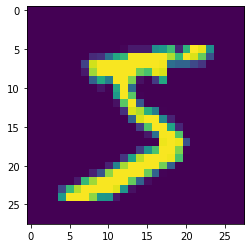

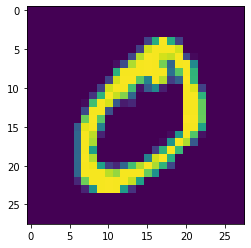

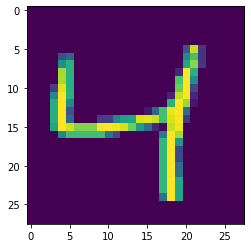

In [53]:
from matplotlib import pyplot as plt
## Use the function plt.imshow to show the first three images in X_train.
## After the image is loaded onto plt.imshow, you'll have to actually render it with plt.show().
for i in x_train[:3]:
    plt.imshow(i)
    plt.show()

## Let's preprocess the input data.

In [54]:
### Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

In [55]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [56]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [57]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [58]:
### Let's see what the labels look like... Print the top 5 labels below.
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
# As you can probably imagine, even though the labels are from 0-9, there's no dependencies between
# the numbers. If a label is 4, the error is the same if you predict 3 or 9.

## One-Hot Encoding

In [ ]:
# To avoid this linear dependency, let's convert our array to a categorical using np_utils.to_categorical

In [59]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [61]:
# What do they look like now? This type of categorization is called One-Hot Encoding.
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Step 7:  Define model architecture.
Now we're ready to define our model architecture. In actual R&D work, researchers will spend a considerable amount of time studying model architectures.

To keep this tutorial moving along, we're not going to discuss the theory or math here. This alone is a rich and meaty field, and we recommend the CS231n class mentioned earlier for those who want to learn more.

Plus, when you're just starting out, you can just replicate proven architectures from academic papers or use existing examples. Here's a list of [example implementations in Keras](https://github.com/fchollet/keras/tree/master/examples).

In [62]:
# The model we're going to build starts with keras.Sequential.
# Then, we'll add an Input of shape input_shape
# A Conv2D with 32 layers, kernel_size of 3, 3, and activation = 'relu'
# A MaxPooling2D with pool size 2, 2
# A Conv2D with 54 layers, kernel_size of 3, 3, and activation = 'relu'
# A MaxPooling2D with pool size 2, 2
# A flattener
# A Dropout with probability 0.5
# A dense layer equal to the number of classes, and I'll let you guess the activation function.
#   Hint: look up activation functions for categorical data.

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)               

### And now we train the model!

In [63]:
# What batch size and number of epochs should we choose?

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 42ms/step - loss: 0.7793 - accuracy: 0.7585 - val_loss: 0.0869 - val_accuracy: 0.9768
Epoch 2/15
422/422 [==============================] - 16s 39ms/step - loss: 0.1237 - accuracy: 0.9620 - val_loss: 0.0632 - val_accuracy: 0.9822
Epoch 3/15
422/422 [==============================] - 18s 42ms/step - loss: 0.0880 - accuracy: 0.9729 - val_loss: 0.0492 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.0436 - val_accuracy: 0.9883
Epoch 5/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0407 - val_accuracy: 0.9888
Epoch 6/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0583 - accuracy: 0.9816 - val_loss: 0.0361 - val_accuracy: 0.9903
Epoch 7/15
422/422 [==============================] - 21s 50ms/step - loss: 0.0516 - accuracy: 0.9834 - val_loss: 0.0348 - val_accuracy:

In [64]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024757428094744682
Test accuracy: 0.9916999936103821
